<a href="https://colab.research.google.com/github/Jurgenvdh/project-1-deep-learning-image-classification-with-cnn/blob/main/Project_1_Deep_Learning_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and Preprocess the Data
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to have mean 0 and standard deviation 1
mean = train_images.mean(axis=(0, 1, 2), keepdims=True)
std = train_images.std(axis=(0, 1, 2), keepdims=True)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

# Step 2: Data Augmentation
# Define data augmentation pipeline using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,          # Rotate images up to 15 degrees
    horizontal_flip=True,       # Randomly flip images horizontally
    width_shift_range=0.1,      # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.1      # Randomly shift images vertically by 10% of the height
)
datagen.fit(train_images)

# Step 3: Define the Model Architecture
# Build a convolutional neural network (CNN) using Keras Sequential API
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(),
                        input_shape=(32, 32, 3)))  # First convolutional layer
model.add(BatchNormalization())                    # Normalize activations
model.add(layers.Activation('relu'))               # Apply ReLU activation
model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))   # Down-sample the feature maps
model.add(Dropout(0.2))                            # Regularization using Dropout

# Convolutional Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Convolutional Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2()))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected Layer
model.add(layers.Flatten())                        # Flatten the 3D feature maps into 1D vector
model.add(layers.Dense(10))                        # Output layer with 10 units for 10 classes

# Step 4: Compile the Model
# Define optimizer and compile the model
optimizer = Adam(learning_rate=0.001)  # Use Adam optimizer with initial learning rate 0.001
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 5: Define Callbacks
# Learning rate scheduler to adjust the learning rate during training
# Learning rate scheduler to adjust the learning rate during training
def lr_scheduler(epoch):
    if epoch < 30:
        return 0.001
    else:
        return 0.0001  # Fixed indentation here

lr_callback = LearningRateScheduler(lr_scheduler)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                                patience=15, restore_best_weights=True)

# Step 6: Train the Model
# Train the model using augmented data and defined callbacks
history = model.fit(datagen.flow(train_images, train_labels, batch_size=100),
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_callback, early_stopping])


# Step 7: Evaluate the Model
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on the test dataset
y_pred_logits = model.predict(test_images)
y_pred = np.argmax(y_pred_logits, axis=1)  # Convert logits to class predictions
y_true = test_labels.flatten()             # Flatten true labels for evaluation

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Step 8: Compute Metrics
# Generate a classification report
report = classification_report(y_true, y_pred, target_names=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
], digits=4)
print("\nClassification Report:\n")
print(report)

# Step 9: Visualize the Confusion Matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
], yticklabels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.3210 - loss: 6.4456 - val_accuracy: 0.5005 - val_loss: 1.8897 - learning_rate: 0.0010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.5146 - loss: 1.8617 - val_accuracy: 0.5488 - val_loss: 1.8173 - learning_rate: 0.0010
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.5687 - loss: 1.7210 - val_accuracy: 0.4285 - val_loss: 2.7342 - learning_rate: 0.0010
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.5843 - loss: 1.7124 - val_accuracy: 0.3824 - val_loss: 2.5965 - learning_rate: 0.0010
Epoch 5/50
110/500 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.5991 - loss: 1.6381

313/313 - 1s - 4ms/step - accuracy: 0.9065 - loss: 0.4799


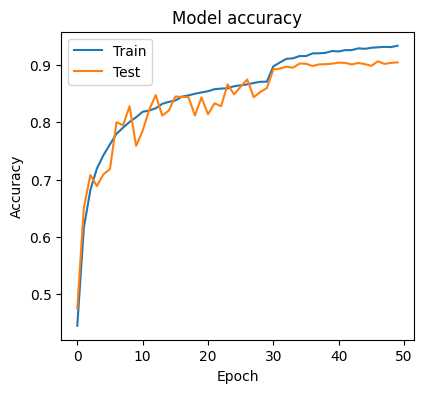

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [22]:
model.save('cifar_model.h5')